In [3]:
library(tidyverse)

In [4]:
library(ggcorrplot)

In [5]:
#Import Data

westca<-read.csv(file.choose())

In [6]:
#look at Data

head(westca)

Date,Geo,newcases,totalcases,newdeaths,totaldeaths,Recovered,Hospitalizations,ICU,Tested,...,Vaccinated,Vaccinated.2,Vac.Distributed,Total.variants,Variant.B.1.1.7,Variant.B.1.351,Variant.P.1,Variant.Nigeria,Variant.unknown,Variant.B.1.617
3/8/2020,ALBERTA,1,1,0,0,0,0,0,828,...,0,0,0,NA,NA,NA,NA,NA,NA,NA
3/9/2020,ALBERTA,6,7,0,0,0,0,0,1282,...,0,0,0,NA,NA,NA,NA,NA,NA,NA
3/11/2020,ALBERTA,7,14,0,0,0,0,0,2714,...,0,0,0,NA,NA,NA,NA,NA,NA,NA
3/12/2020,ALBERTA,5,19,0,0,0,0,0,4048,...,0,0,0,NA,NA,NA,NA,NA,NA,NA
3/13/2020,ALBERTA,4,23,0,0,0,7,2,5195,...,0,0,0,NA,NA,NA,NA,NA,NA,NA
3/14/2020,ALBERTA,6,29,0,0,0,7,2,6782,...,0,0,0,NA,NA,NA,NA,NA,NA,NA


In [7]:
#check data type and informations

glimpse(westca)

Observations: 2,014
Variables: 21
$ Date             <fct> 3/8/2020, 3/9/2020, 3/11/2020, 3/12/2020, 3/13/202...
$ Geo              <fct> ALBERTA, ALBERTA, ALBERTA, ALBERTA, ALBERTA, ALBER...
$ newcases         <int> 1, 6, 7, 5, 4, 6, 10, 17, 18, 23, 49, 49, 31, 33, ...
$ totalcases       <int> 1, 7, 14, 19, 23, 29, 39, 56, 74, 97, 146, 195, 22...
$ newdeaths        <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,...
$ totaldeaths      <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2,...
$ Recovered        <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3,...
$ Hospitalizations <int> 0, 0, 0, 0, 7, 7, 7, 8, 10, 15, 17, 18, 21, 22, 24...
$ ICU              <int> 0, 0, 0, 0, 2, 2, 2, 2, 3, 3, 8, 9, 10, 10, 10, 11...
$ Tested           <int> 828, 1282, 2714, 4048, 5195, 6782, 8337, 10171, 11...
$ Positivity       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ Vaccinated       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ Vaccinated.2    

In [14]:
#check to see how many NA we have

westca %>% summarise_all(funs(sum(is.na(.))))

#colSums(is.na(westca))--summarise_all takes lot less space so I used it instead.

Date,Geo,newcases,totalcases,newdeaths,totaldeaths,Recovered,Hospitalizations,ICU,Tested,...,Vaccinated,Vaccinated.2,Vac.Distributed,Total.variants,Variant.B.1.1.7,Variant.B.1.351,Variant.P.1,Variant.Nigeria,Variant.unknown,Variant.B.1.617
0,0,0,0,0,0,0,0,0,0,...,0,0,0,1446,1446,1446,1446,1446,1546,1762


In [15]:
#By identify all the NA are the 0 case in the variants cases columns, I will replace the “NA” with “0”

westca[is.na(westca)]<-0

In [10]:
#check if we have and duplicate date in the dataset

duplicated(westca[,1:2])

#Returned all FALSE so we are good no futher investigation needed

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

In [11]:
#find the correlation between new cases new deaths and vaccine

cor(westca[3:10],method="pearson")

,newcases,totalcases,newdeaths,totaldeaths,Recovered,Hospitalizations,ICU,Tested
newcases,1.0000000,0.4980922,0.4519074,0.4865366,0.4440333,0.7842441,0.7777338,0.5865920
totalcases,0.4980922,1.0000000,0.2605098,0.9575574,0.9977198,0.6385718,0.7047338,0.9680926
newdeaths,0.4519074,0.2605098,1.0000000,0.3050219,0.2299010,0.6065678,0.5263207,0.3152436
totaldeaths,0.4865366,0.9575574,0.3050219,1.0000000,0.9543286,0.6590060,0.7117342,0.9190810
Recovered,0.4440333,0.9977198,0.2299010,0.9543286,1.0000000,0.5932108,0.6653585,0.9585418
Hospitalizations,0.7842441,0.6385718,0.6065678,0.6590060,0.5932108,1.0000000,0.9314299,0.6735064
ICU,0.7777338,0.7047338,0.5263207,0.7117342,0.6653585,0.9314299,1.0000000,0.7123502
Tested,0.5865920,0.9680926,0.3152436,0.9190810,0.9585418,0.6735064,0.7123502,1.0000000


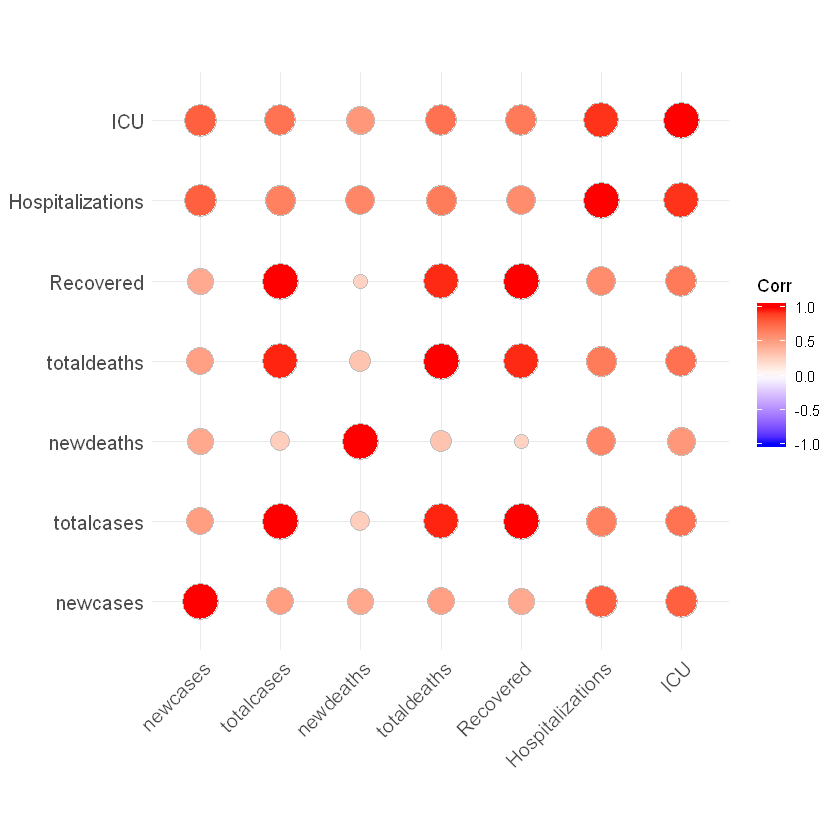

In [12]:
##heatmap correlation for the selected columns

ggcorrplot(cor(westca[3:9],method="pearson"),method="circle")

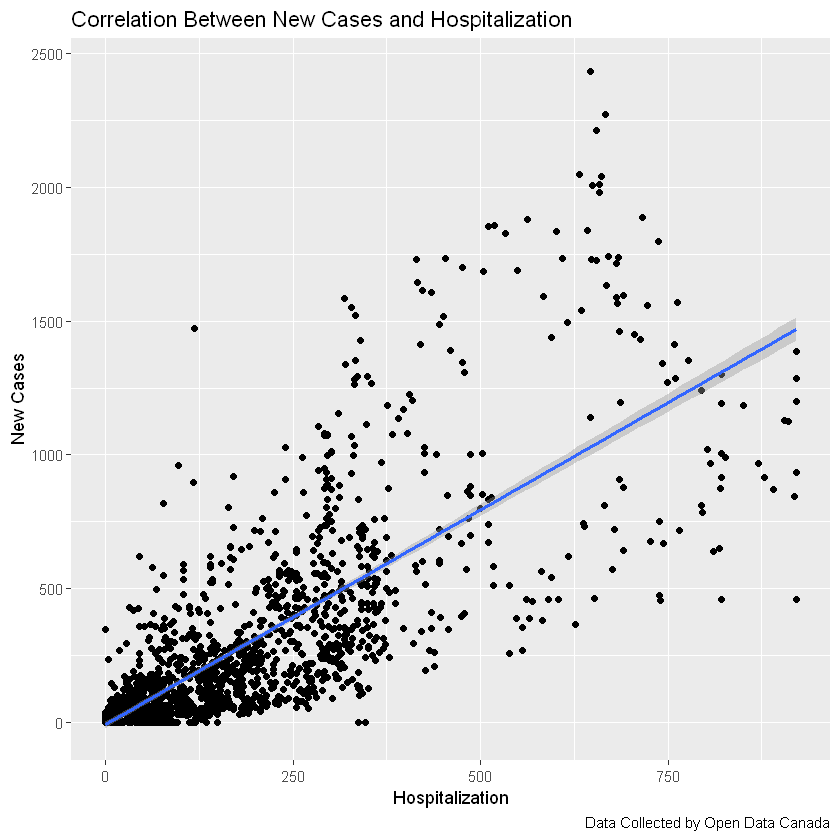

In [13]:
# plot with New cases vs Hospitalizations
ggplot(data=westca)+
geom_point(mapping = aes(x = Hospitalizations, y = newcases))+
geom_smooth(method='lm',mapping = aes(x = Hospitalizations, y = newcases))+
labs(title="Correlation Between New Cases and Hospitalization ", x= 'Hospitalization', y= 'New Cases',
       caption = "Data Collected by Open Data Canada")

# high correlation between new cases and hospitalizations
# I am right